<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Date-and-time-processing" data-toc-modified-id="Date-and-time-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Date and time processing</a></span></li><li><span><a href="#Recap:-boxplot" data-toc-modified-id="Recap:-boxplot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recap: boxplot</a></span></li><li><span><a href="#Recap:-histogram" data-toc-modified-id="Recap:-histogram-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Recap: histogram</a></span></li><li><span><a href="#Recap:-line-plot,-or-sequence-plot-(and-learning-about-for-loops!)" data-toc-modified-id="Recap:-line-plot,-or-sequence-plot-(and-learning-about-for-loops!)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Recap: line plot, or sequence plot (and learning about for-loops!)</a></span></li><li><span><a href="#Recap:-correlation,-and-introducing-the-scatter-plot-matrix" data-toc-modified-id="Recap:-correlation,-and-introducing-the-scatter-plot-matrix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Recap: correlation, and introducing the scatter plot matrix</a></span></li><li><span><a href="#Try-it-again,-on-a-different-data-set" data-toc-modified-id="Try-it-again,-on-a-different-data-set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Try it again, on a different data set</a></span></li><li><span><a href="#Testing-your-knowledge-on-another-data-set" data-toc-modified-id="Testing-your-knowledge-on-another-data-set-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Testing your knowledge on another data set</a></span></li><li><span><a href="#Learn-about-filtering-and-grouping-using-the-Blender-Efficiency-dataset" data-toc-modified-id="Learn-about-filtering-and-grouping-using-the-Blender-Efficiency-dataset-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Learn about filtering and grouping using the Blender Efficiency dataset</a></span></li><li><span><a href="#Keeping-Conda-up-to-date-and-installing-new-packages" data-toc-modified-id="Keeping-Conda-up-to-date-and-installing-new-packages-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Keeping Conda up to date and installing new packages</a></span><ul class="toc-item"><li><span><a href="#Installing-a-new-package-in-your-virtual-environment" data-toc-modified-id="Installing-a-new-package-in-your-virtual-environment-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Installing a new package in your virtual environment</a></span></li><li><span><a href="#Updating-an-existing-package" data-toc-modified-id="Updating-an-existing-package-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Updating an existing package</a></span></li></ul></li></ul></div>

> All content here is under a Creative Commons Attribution [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) and all source code is released under a [BSD-2 clause license](https://en.wikipedia.org/wiki/BSD_licenses).
>
>Please reuse, remix, revise, and [reshare this content](https://github.com/kgdunn/python-basic-notebooks) in any way, keeping this notice.

# Course overview

This is the fourth module of several (11, 12, 13, 14, 15 and 16), which refocuses the course material in the [prior 10  modules](https://github.com/kgdunn/python-basic-notebooks) in a slightly different way. It places more emphasis on

* dealing with data: importing, merging, filtering;
* calculations from the data;
* visualization of it.

In short: ***how to extract value from your data***.


# Module 14 Overview

In this module we will cover

* Setting date and time stamps
* More plots with Pandas
* Plotting with the Seaborn library
* Using the .loc and .iloc functions for a data frame
* Filtering and grouping data

**Requirements before starting**

* Have your Python installation working as you had for modules 11, 12 and 13, including the Pandas library installed.

## Date and time processing

In the [prior module](https://yint.org/pybasic13) you learned about box plots, histogram plot, time-series (or sequence) plots, and scatter plots. We will revise some of those, and build on that knowledge a bit further.

Start with the data from an actual plant, where we have 5 columns of measurements from a [flotation cell](https://en.wikipedia.org/wiki/Froth_flotation). Read the link if you need a quick overview of what flotation is.

In [1]:
import pandas as pd
flot = pd.read_csv("https://openmv.net/file/flotation-cell.csv")

Some things to do with a new data set called `df`:

* `df.head()` and `df.tail()` to check you have the right data
* `df.describe()` to get some basic statistics
* `df.info()` to see the data types

In the space below, apply these to the data you just read in:


Next plot sequence plots of all data columns, using this command

```python
ax = flot.plot()
```

Notice that the x-axis is not time-based, even though there is a column in data frame called `"Date and time"`. So what went wrong?

When reading in a new data frame you might need to first:
* force a column to be of the `type` of date and time, so Pandas can use it in the plots
* set that column to be the index of your data frame.

and then you can proceed with your plotting and data analysis.

To set a column to the right type, you can use the ``pd.to_datetime(...)`` function. Many times Pandas will get it right, but if it doesn't you can give it some help.

So try this first below. If it works, you are lucky, and can continue.
```python
flot["Timestamp"] = pd.to_datetime(flot["Date and time"])
```

Note that we created a new column. Check it with ``flot.info()`` again, to see if it is of the right type. You can of course simply overwrite your previous column.

If the conversion did not work, you could have given it some guidance.

For example:
```python
pd.to_datetime("20/12/21", yearfirst=True)  # it is supposed to be 21 December 2020
pd.to_datetime("20/12/21", dayfirst=True)   # it is supposed to be 20 December 2021
pd.to_datetime("20/12/21", format="%d/%m", exact=False)
```

For the `format` specifier, you can see all the options available from this page: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

Once you have the column correctly as a date and time stamp, you probably want this to be your data frame index.
``` python
flot=flot.set_index("Timestamp")
flot.plot()
```

Now you will see a short break in the data around 09:00 on 16 December 2004 which was not visible before.

## Recap: boxplot



A box plot can be shown per column in one simple line for a data frame `df`:

```python
df.plot.box(figsize=(width, height))
```
for a given `width` and `height` (specified in inches).

Does it make sense to plot box plots for all columns, especially when units and orders of magnitude are so different?

So now rather plot only the box plot for "Upstream pH":


Notice that there are so many outliers beyond the whiskers.  What is going on? Look at the time-based plot of that column:

```python
df["name of column"].plot.line()
```

## Recap: histogram

Similar to ``df.plot.line()`` and ``df.plot.box`` to get a line and box plot, you can also use ``df.plot.hist()`` to get a histogram. 

But this tries to put all histograms in one plot. Rather, to get one histogram per variable, try:
```python
flot.hist()
```
and adjust the figure size to show them nicely. Also adjust the number of bins, and colour to be `'lightblue'`.

## Recap: line plot, or sequence plot (and learning about for-loops!)

If you use this code, you will get all the line plots in the same plot:
```python
flot["Timestamp"] = pd.to_datetime(flot["Date and time"])
flot=flot.set_index("Timestamp")
flot.plot()
```

But if you want each plot in its own axis, your can use a loop:
```python
for column in flot.columns:
    print(column)
    flot[column].plot()
```

Pandas can only plot columns of numeric data. If the column is non-numeric, it will create an error. So to ensure the loop only goes through numeric columns, you can filter on that. Change the first lines to 

```python
numeric_columns = flot.select_dtypes(include=[np.number])
for column in numeric_columns:
    # loop content goes here, indented
```

Again, this is not quite what we want. We want to create a new figure for each column. So we have to add one more line to our loop to force a new figure to be created. Another line sets the label on the y-axis.

Notice also that you do not need to create the looping variable.

```python
import matplotlib.pyplot as plt
for column in flot.select_dtypes(include=[np.number]).columns:
    plt.figure()
    ax = flot[column].plot()
    ax.set_ylabel(column)
```

## Recap: correlation, and introducing the scatter plot matrix

We saw the correlation matrix can be calculated with this handy one-liner:

```python
df.corr()
```

Do this below for the flotation data. Any interesting leads to investigate?

The scatter plot matrix is a visual tool to help create a scatter plot of each combination. The plot on the diagonal would not be an interesting scatter plot, so this is often replaced with a histogram or a kernel density estimate (kde) plot.

Use the code below to try creating both types:
```python
from pandas.plotting import scatter_matrix

scatter_matrix(dataframe, alpha = 0.2, figsize=(10, 8), diagonal = 'kde');
scatter_matrix(dataframe, alpha = 0.2, figsize=(10, 8), diagonal = 'hist');
```


## Try it again, on a different data set

There is another data set, about the taste of Cheddar cheese: https://openmv.net/info/cheddar-cheese

Read the data set in:
```python
cheese = pd.read_csv("https://openmv.net/file/cheddar-cheese.csv")
```

1. Drop the column called "Case"
2. Calculate the correlation matrix of values and display that
3. Plot a scatter plot matrix of these values:
  
  * with the "kde" on the diagonal
  * squares for the markers
  * alpha value of 0.8 for the points. 
  
*Hint*: look at the documentation for `scatter_matrix` to see how to do this. You can look at the documentation inside Jupyter in several ways:
* ``help(scatter_matrix)``
* ``scatter_matrix?`` and then hit Ctrl-Enter.

## Testing your knowledge on another data set

Digester case study

* Plot time sequence plots of each variable.
* Correlations between columns?
* Correlation plot as a heatmap?
* Top 5 correlations related to "Y-Kappa"
* Select only those columns: scatter plot matrix: 6 x 6 matrix.

In [12]:

df.corr()

,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AAWhiteSt-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
Y-Kappa,1.000000,0.088138,-0.313867,-0.088239,0.419576,-0.201283,-0.288043,-0.155005,-0.521955,0.148483,...,-0.515545,0.089256,0.165685,-0.375950,-0.071248,0.204550,0.056443,-0.529088,0.310067,-0.011788
ChipRate,0.088138,1.000000,-0.626921,0.398160,-0.083214,0.138304,0.496885,0.140783,0.445803,0.031279,...,0.328192,-0.363541,-0.421371,0.446728,0.072428,-0.253824,0.259011,0.378349,-0.262223,-0.005074
BF-CMratio,-0.313867,-0.626921,1.000000,-0.117674,-0.005886,0.047041,-0.136344,-0.087648,-0.071012,-0.064239,...,0.046086,0.317975,0.278921,-0.095022,0.151995,0.204536,-0.382994,0.009601,0.084696,0.017648
BlowFlow,-0.088239,0.398160,-0.117674,1.000000,0.050869,0.191242,0.371012,-0.041164,0.310334,0.070315,...,0.306856,-0.124710,-0.169092,0.291534,0.118642,-0.138090,0.005912,0.237375,-0.146241,0.019811
ChipLevel4,0.419576,-0.083214,-0.005886,0.050869,1.000000,-0.263875,-0.352767,-0.320232,-0.354362,0.376666,...,-0.225618,0.072274,0.198583,-0.370602,0.079725,0.017146,-0.064666,-0.581272,0.284855,0.126214
T-upperExt-2,-0.201283,0.138304,0.047041,0.191242,-0.263875,1.000000,0.473309,0.182460,0.256723,-0.103011,...,0.400396,0.096245,-0.072660,0.273471,0.118109,0.044352,0.002431,0.421113,-0.275214,0.133049
T-lowerExt-2,-0.288043,0.496885,-0.136344,0.371012,-0.352767,0.473309,1.000000,-0.028500,0.699895,-0.248721,...,0.618458,-0.364906,-0.510970,0.656574,-0.039253,-0.426224,-0.025551,0.629301,-0.588570,-0.030541
UCZAA,-0.155005,0.140783,-0.087648,-0.041164,-0.320232,0.182460,-0.028500,1.000000,-0.092060,-0.127118,...,0.007225,0.521079,0.392008,0.042648,-0.033386,0.602307,0.382492,0.323625,0.181589,-0.229867
WhiteFlow-4,-0.521955,0.445803,-0.071012,0.310334,-0.354362,0.256723,0.699895,-0.092060,1.000000,-0.102395,...,0.838599,-0.560857,-0.653562,0.817931,0.199168,-0.515211,-0.185512,0.688448,-0.626129,0.017586
AAWhiteSt-4,0.148483,0.031279,-0.064239,0.070315,0.376666,-0.103011,-0.248721,-0.127118,-0.102395,1.000000,...,0.007546,0.068382,0.140546,-0.069608,0.293730,0.041032,-0.148625,-0.135190,0.020768,0.340821


In [13]:
df.corr('spearman')

,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AAWhiteSt-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
Y-Kappa,1.000000,0.054368,-0.283837,-0.133194,0.376689,-0.235835,-0.402137,-0.180508,-0.541708,0.090728,...,-0.560212,-0.010060,0.153966,-0.440491,-0.122801,0.180061,0.063848,-0.559987,0.313794,-0.009301
ChipRate,0.054368,1.000000,-0.726987,0.433171,-0.090676,0.133623,0.368874,0.146343,0.416852,0.154471,...,0.295036,-0.326743,-0.417603,0.394945,0.044001,-0.222341,0.262528,0.387489,-0.303691,-0.031979
BF-CMratio,-0.283837,-0.726987,1.000000,-0.075549,0.018611,0.021417,-0.128031,-0.057854,-0.156444,-0.108701,...,0.000906,0.401180,0.362823,-0.128215,0.172864,0.264189,-0.368442,-0.064188,0.177835,0.050182
BlowFlow,-0.133194,0.433171,-0.075549,1.000000,0.117762,0.241258,0.346449,0.027465,0.374515,0.196746,...,0.389719,-0.056749,-0.176065,0.299915,0.299576,-0.083246,-0.102279,0.357765,-0.297022,-0.029065
ChipLevel4,0.376689,-0.090676,0.018611,0.117762,1.000000,-0.254943,-0.349394,-0.265537,-0.368567,0.373234,...,-0.230118,0.098422,0.245750,-0.391766,0.080472,0.015839,-0.048172,-0.576441,0.270381,0.122675
T-upperExt-2,-0.235835,0.133623,0.021417,0.241258,-0.254943,1.000000,0.528427,0.156975,0.267388,0.003819,...,0.431697,0.092262,-0.121062,0.246541,0.146811,-0.020079,0.010237,0.401379,-0.306362,0.166479
T-lowerExt-2,-0.402137,0.368874,-0.128031,0.346449,-0.349394,0.528427,1.000000,0.042843,0.658713,-0.021324,...,0.627141,-0.224575,-0.459032,0.591293,-0.003997,-0.385515,-0.035364,0.633103,-0.643245,-0.011912
UCZAA,-0.180508,0.146343,-0.057854,0.027465,-0.265537,0.156975,0.042843,1.000000,-0.125124,-0.085585,...,0.008728,0.517117,0.335378,0.034875,-0.021300,0.597041,0.351819,0.291174,0.213228,-0.199399
WhiteFlow-4,-0.541708,0.416852,-0.156444,0.374515,-0.368567,0.267388,0.658713,-0.125124,1.000000,0.025595,...,0.825732,-0.469477,-0.632844,0.798551,0.197757,-0.497826,-0.190624,0.690848,-0.671579,-0.018617
AAWhiteSt-4,0.090728,0.154471,-0.108701,0.196746,0.373234,0.003819,-0.021324,-0.085585,0.025595,1.000000,...,0.161944,0.149158,0.077670,0.097940,0.285374,0.056113,-0.177184,-0.013972,-0.066848,0.382447


## Learn about filtering and grouping using the Blender Efficiency dataset

* Import data.
* Table
* Sort by y-value (last column)
* What is related to it?
* Is a boxplot useful?
* Corr matrix
* scatter_matrix(blender, alpha = 0.8, figsize=(20,20), diagonal = 'hist', marker='s'); <-- shows the DoE structure
* Filter results by Particle Size
* Groupby ParticleSize
* Calculate the mean efficiency within each particle size category


In [ ]:
import pandas as pd
blender = pd.read_csv('http://openmv.net/file/blender-efficiency.csv')
blender.corr()
scatter_matrix(blender, alpha = 0.8, figsize=(20,20), diagonal = 'hist', marker='s');

blender.groupby("ParticleSize").std()

#blender.boxplot()
#blender.sort_values('BlendingEfficiency', inplace=True)
#blender.hist(figsize=(20,20))
#flot.loc[:, ["Air flow rate"]].boxplot()

# Diversion: how is time represented?

Try the following in the space below:
```python
from datetime import datetime
now = datetime.now()

# Do some things with `now`:
print(now)
print(now.year)
print(f"Which weekday is it today? It is day: {now.isoweekday()} in the week")
print(now.second)
print(now.seconds) # use singular
```



After trying the above, try these lines below. Comment out the lines that cause errors.

```python
later = datetime.now()
print(later)
print(type(later))
print(later - now)
print(now - later) 
print(now + later)

delta = later - now
print(delta)
print(type(delta))
print(f"There were this many seconds between 'now' and 'later': {delta.total_seconds()}")
print(later + delta)

sometime_in_the_future = later + delta*1000
print(sometime_in_the_future)
print(sometime_in_the_future - now)
```

In [ ]:

delta = later - now
print(delta)
print(type(delta))
print(f"There were this many seconds between 'now' and 'later': {delta.total_seconds()}")
print(later + delta)

sometime_in_the_future = later + delta*1000
print(sometime_in_the_future)
print(sometime_in_the_future - now)

https://realpython.com/pandas-dataframe/#working-with-time-series
• (outfile["Start_datetime"] - outfile["Start_datetime_first"]).apply(lambda x: x.total_seconds() / 60.0 / 60 /24)
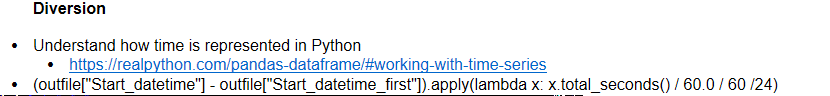

temp_c = [ 8.0,  7.1,  6.8,  6.4,  6.0,  5.4,  4.8,  5.0,
...            9.1, 12.8, 15.3, 19.1, 21.2, 22.1, 22.4, 23.1,
...           21.0, 17.9, 15.5, 14.4, 11.9, 11.0, 10.2,  9.1]
Now you have the variable temp_c, which refers to the list of temperature values.

The next step is to create a sequence of dates and times. Pandas provides a very convenient function, date_range(), for this purpose:

>>> dt = pd.date_range(start='2019-10-27 00:00:00.0', periods=24,
...                    freq='H')
>>> dt
DatetimeIndex(['2019-10-27 00:00:00', '2019-10-27 01:00:00',
               '2019-10-27 02:00:00', '2019-10-27 03:00:00',
               '2019-10-27 04:00:00', '2019-10-27 05:00:00',
               '2019-10-27 06:00:00', '2019-10-27 07:00:00',
               '2019-10-27 08:00:00', '2019-10-27 09:00:00',
               '2019-10-27 10:00:00', '2019-10-27 11:00:00',
               '2019-10-27 12:00:00', '2019-10-27 13:00:00',
               '2019-10-27 14:00:00', '2019-10-27 15:00:00',
               '2019-10-27 16:00:00', '2019-10-27 17:00:00',
               '2019-10-27 18:00:00', '2019-10-27 19:00:00',
               '2019-10-27 20:00:00', '2019-10-27 21:00:00',
               '2019-10-27 22:00:00', '2019-10-27 23:00:00'],
              dtype='datetime64[ns]', freq='H')
              

## Keeping Conda up to date and installing new packages

Newer versions of packages are released frequently. You can update your packages (libraries), with this command::
```bash

    conda update -n base conda
    conda update --all
```

### Installing a new package in your virtual environment

You will come across people recommending different packages in Python for all sorts of interesting applications. For example, the library `seaborn` is often recommended for visualization. But you might not have it installed yet. 

This is how you can install the package called `seaborn` in your virtual environment called ``myenv``:
```bash
    conda activate myenv    <--- change the last word in the command to the name of your actual environment
    pip install seaboard
```

Or in one line:
```bash
    conda install -n myenv seaborn
```


### Updating an existing package

Similar to the above, you can update a package to the latest version. Just change ``install`` to ``update`` instead.
Or in one line:
```bash
    conda update -n myenv seaborn
```

In [ ]:
# IGNORE this. Execute this cell to load the notebook's style sheet.
from IPython.core.display import HTML
css_file = './images/style.css'
HTML(open(css_file, "r").read())